In [2]:
# Imports the print function from newer versions of python
from __future__ import print_function

# Setup

# The Random module implements pseudo-random number generators
import random 

# Numpy is the main package for scientific computing with Python. 
# This will be one of our most used libraries in this class
import numpy as np

# The Time library helps us time code runtimes
import time

# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt

from imageManip import *

# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# points a, b and, c
a, b, c, d = (0, 1, 0), (1, 0, 1), (0, -1, 2), (-1, 0, 3)

# matrix with row vectors of points
A = np.array([a, b, c, d])
print(f'The matrix with row vectors of points\n {A}')
print(A.shape)

# 3x3 Identity transformation matrix
I = np.eye(3)
print(f'The identity matrix is \n {I}')

The matrix with row vectors of points
 [[ 0  1  0]
 [ 1  0  1]
 [ 0 -1  2]
 [-1  0  3]]
(4, 3)
The identity matrix is 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


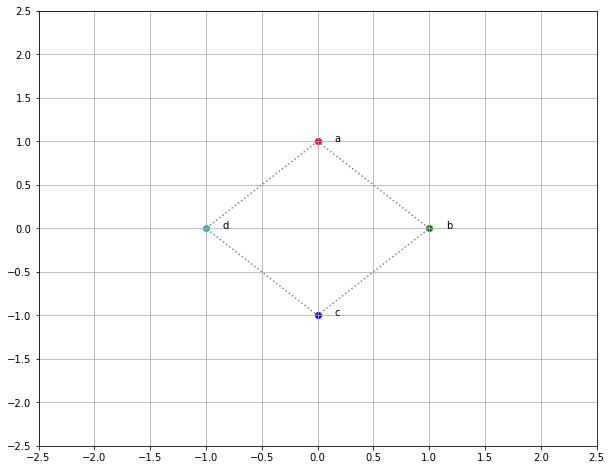

In [4]:
import string

color_lut = 'rgbc'
# creates a new figure or activate an existing figure
fig = plt.figure()
# get the current axis, creates one if necessary      
ax = plt.gca()      
# empty list which is not null, it is just empty
xs = []
ys = []
for row in A:    
    #print(f'The row is:\n {row}')
    output_row = I @ row
    x, y, i = output_row
    #print(f'The output matrix is: \n {output_row}')    
    xs.append(x)
    ys.append(y)
    i = int(i) # convert float to int for indexing
    c = color_lut[i]
    plt.scatter(x, y, color=c)
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}")
xs.append(xs[0])
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

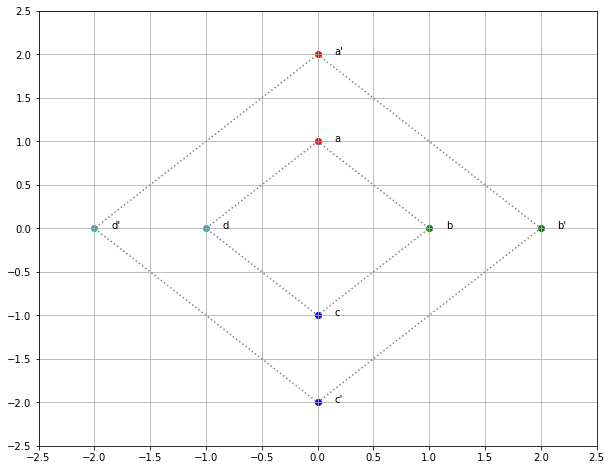

In [5]:
# create the scaling transformation matrix
T_s = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 1]])

fig = plt.figure()
ax = plt.gca()
xs_s = []
ys_s = []
for row in A:
    output_row = T_s @ row
    x, y, i = row
    x_s, y_s, i_s = output_row
    xs_s.append(x_s)
    ys_s.append(y_s)
    i, i_s = int(i), int(i_s) # convert float to int for indexing
    c, c_s = color_lut[i], color_lut[i_s] # these are the same but, its good to be explicit
    plt.scatter(x, y, color=c)
    plt.scatter(x_s, y_s, color=c_s)
    plt.text(x + 0.15, y, f"{string.ascii_letters[int(i)]}")
    plt.text(x_s + 0.15, y_s, f"{string.ascii_letters[int(i_s)]}'")

xs_s.append(xs_s[0])
ys_s.append(ys_s[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_s, ys_s, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

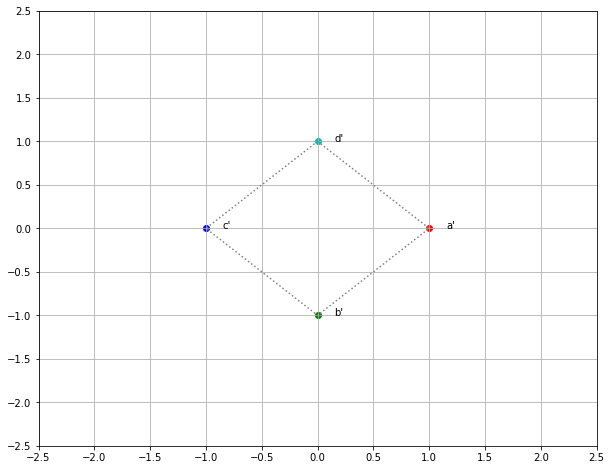

In [6]:
# create the rotation transformation matrix
T_r = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])

fig = plt.figure()
ax = plt.gca()
for row in A:
    output_row = T_r @ row
    x_r, y_r, i_r = output_row
    i_r = int(i_r) # convert float to int for indexing
    c_r = color_lut[i_r] # these are the same but, its good to be explicit
    letter_r = string.ascii_letters[i_r]
    plt.scatter(x_r, y_r, color=c_r)
    plt.text(x_r + 0.15, y_r, f"{letter_r}'")

plt.plot(xs, ys, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

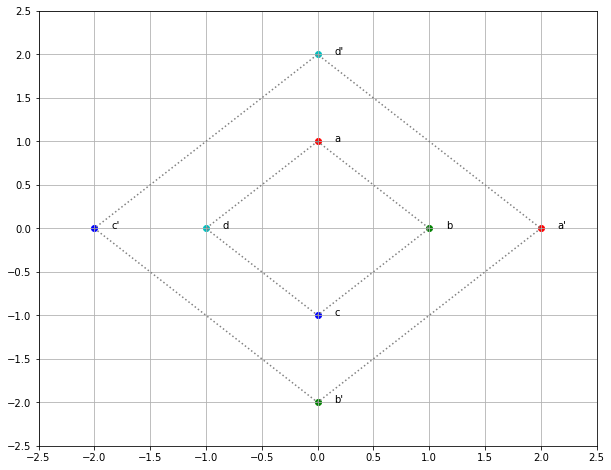

In [7]:
# create combined tranformation matrix
T = T_s @ T_r

fig = plt.figure()
ax = plt.gca()

xs_comb = []
ys_comb = []
for row in A:
    output_row = T @ row
    x, y, i = row
    x_comb, y_comb, i_comb = output_row
    xs_comb.append(x_comb)
    ys_comb.append(y_comb)
    i, i_comb = int(i), int(i_comb) # convert float to int for indexing
    c, c_comb = color_lut[i], color_lut[i_comb] # these are the same but, its good to be explicit
    letter, letter_comb = string.ascii_letters[i], string.ascii_letters[i_comb]
    plt.scatter(x, y, color=c)
    plt.scatter(x_comb, y_comb, color=c_comb)
    plt.text(x + 0.15 , y, f"{letter}")
    plt.text(x_comb + 0.15, y_comb, f"{letter_comb}'")
xs_comb.append(xs_comb[0])
ys_comb.append(ys_comb[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_comb, ys_comb, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

In [27]:
image1_path = './image1.jpg'
image2_path = './image2.jpg'
image3_path = './letterR.jpg'
image4_path = './left.png'

def display(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

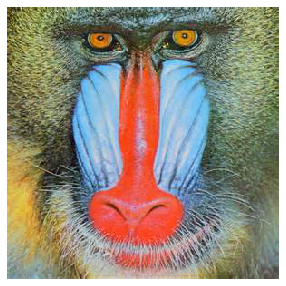

In [9]:
image1 = load(image1_path)

display(image1)

In [10]:
imagecopy = np.copy(image1)
print(f'The Shape of the image: \n {imagecopy.shape}')

The Shape of the image: 
 (300, 300, 3)


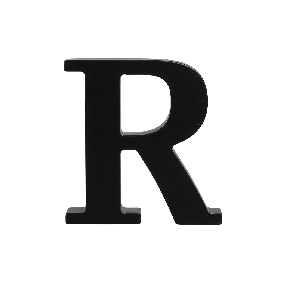

The Shape of the image: 
 (1000, 1000, 4)


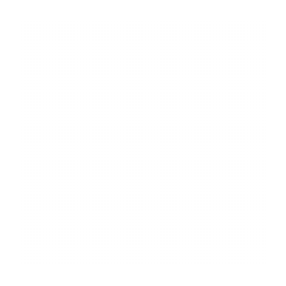

In [18]:
image3 = load(image3_path)
display(image3)
image3copy = np.copy(image3)
print(f'The Shape of the image: \n {image3copy.shape}')

height, width, channel = image3copy.shape
scale_y, scale_x = 2,2
image_transformed = np.empty((height * scale_y, width * scale_x, channel), dtype=np.uint8)

for i, row in enumerate(image3copy):
    for j, col in enumerate(row):
        pixel_data = image3copy[i, j, :]
        input_coords = np.array([i, j, 1])
        i_out, j_out, _ = T @ input_coords
        image_transformed[int(i_out), int(j_out), :] = pixel_data

display(image_transformed)


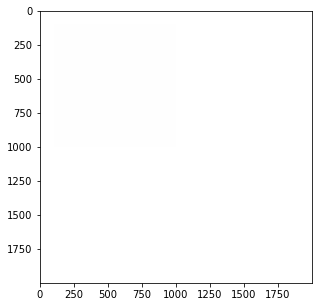

In [19]:
T_inv = np.linalg.inv(T)

# nearest neighbors interpolation
def nearest_neighbors(i, j, M, T_inv):
    x_max, y_max = M.shape[0] - 1, M.shape[1] - 1
    x, y, _ = T_inv @ np.array([i, j, 1])
    if np.floor(x) == x and np.floor(y) == y:
        x, y = int(x), int(y)
        return M[x, y]
    if np.abs(np.floor(x) - x) < np.abs(np.ceil(x) - x):
        x = int(np.floor(x))
    else:
        x = int(np.ceil(x))
    if np.abs(np.floor(y) - y) < np.abs(np.ceil(y) - y):
        y = int(np.floor(y))
    else:
        y = int(np.ceil(y))
    if x > x_max:
        x = x_max
    if y > y_max:
        y = y_max
    return M[x, y,]

height, width, channel = image3copy.shape
scale_y, scale_x = 2,2
image_transformed = np.empty((height * scale_y, width * scale_x, channel), dtype=np.uint8)

for i, row in enumerate(image3copy):
    for j, col in enumerate(row):
        image_transformed[i, j, :] = nearest_neighbors(i, j, image3copy, T_inv)


plt.figure(figsize=(5, 5))
plt.imshow(image_transformed)

In [20]:
img = plt.imread('letterR.jpg')
img.shape

(1000, 1000, 4)

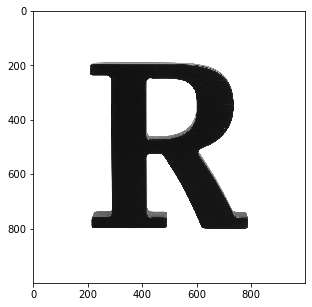

In [21]:
plt.figure(figsize=(5, 5))
plt.imshow(img)

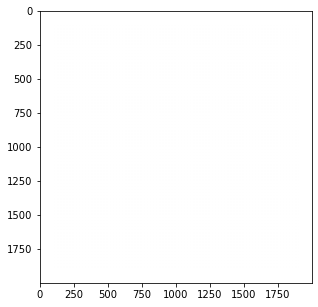

In [22]:
img_transformed = np.empty((2000, 2000, 4), dtype=np.uint8)
for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j, :]
        input_coords = np.array([i, j, 1])
        i_out, j_out, _ = T @ input_coords
        img_transformed[i_out, j_out, :] = pixel_data

plt.figure(figsize=(5, 5))
plt.imshow(img_transformed)

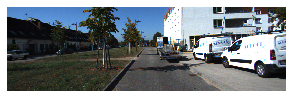

In [28]:
image4 = load(image4_path)
display(image4)

In [34]:
image4copy = np.copy(image4)

height, width = image4copy.shape[:2]
tx, ty = np.array((width // 2, height // 2))
angle = np.radians(45)
scale = 2.0

R = np.array([
    [np.cos(angle), np.sin(angle), 0],
    [-np.sin(angle), np.cos(angle), 0],
    [0, 0, 1]
])
T = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])
S = np.array([
    [scale, 0, 0],
    [0, scale, 0],
    [0, 0, 1]
])

A = T @ R @ S @ np.linalg.inv(T)



In [43]:
def get_grid(x, y, homogenous=False):
    coords = np.indices((x, y)).reshape(2, -1)
    return np.vstack((coords, np.ones(coords.shape[1]))) if homogenous else coords
 

# Grid representing image coordinates
coords = get_grid(width,height, True)
x1, y1 = coords[0], coords[1]

# Apply transformation and nearest neighbor interpolation
warp_coords = np.round(A@coords).astype(np.int)
x2, y2 = warp_coords[0, :], warp_coords[1, :]

# Get pixels within image
indices = np.where((x2 >= 0) & (x2 < width) &
                   (y2 >= 0) & (y2 < height))

xpix2, ypix2 = x2[indices], y2[indices]
xpix1, ypix1 = x1[indices], y1[indices]   
# Map the pixel RGB data to a new position in another array
canvas = np.zeros_like(image4copy)
canvas[ypix2, xpix2] = image4copy[ypix1, xpix1]  


IndexError: arrays used as indices must be of integer (or boolean) type